# **Loading the IBM Dataset:**

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 25s 1us/step


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


# **Encoding a integer sequence into binary matrix:**

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# **Model Definition:**

In [38]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# from keras import regularizers

# model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(10000,),
#                        kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(16, activation='relu',
#                        kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1, activation='sigmoid'))

c:\Users\muqad\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compiling the Model:**

In [39]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

# **Configuring the optimizer:**

In [41]:
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss='binary_crossentropy',
# metrics=['accuracy'])

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [42]:
# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss=losses.binary_crossentropy,
# metrics=[metrics.binary_accuracy])

from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [43]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

# **Training of Model:**

In [44]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])


from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop])
# history = model.fit(partial_x_train,
# partial_y_train,
# epochs=20,
# batch_size=512,
# validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.7619 - loss: 0.5639 - val_acc: 0.8612 - val_loss: 0.4345
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8861 - loss: 0.3610 - val_acc: 0.8797 - val_loss: 0.3365
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9123 - loss: 0.2688 - val_acc: 0.8831 - val_loss: 0.3006
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9293 - loss: 0.2153 - val_acc: 0.8893 - val_loss: 0.2804
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9379 - loss: 0.1822 - val_acc: 0.8878 - val_loss: 0.2771
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9513 - loss: 0.1519 - val_acc: 0.8826 - val_loss: 0.2899
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9555 - loss: 0.1360 - val_acc: 0.8856 - val_loss: 0.2902


In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

# **Plotting Training and Validation Loss:**

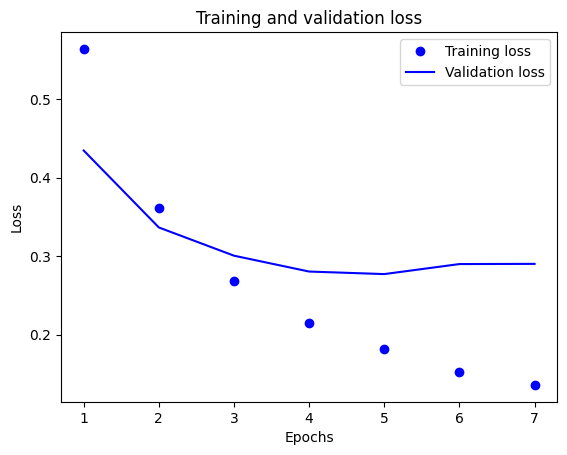

In [46]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
# acc = history.history['binary_accuracy']
# val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Plotting Training and Validation Accuracy:**

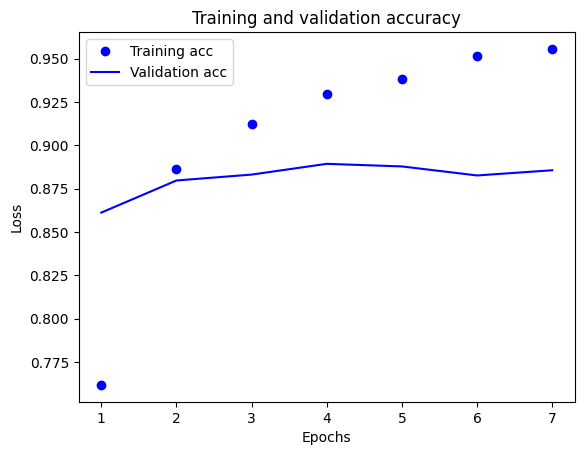

In [47]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Confusion Matrix:**

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


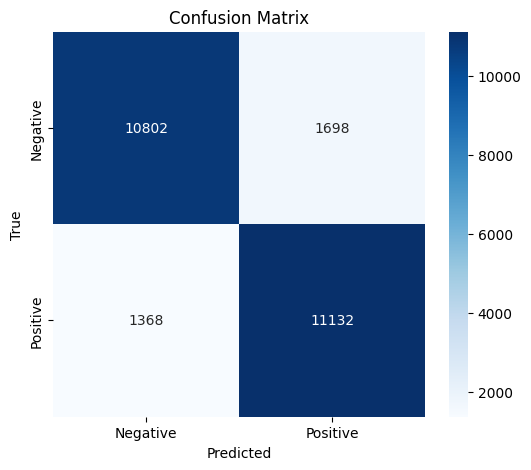

              precision    recall  f1-score   support

    Negative       0.89      0.86      0.88     12500
    Positive       0.87      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate on test data
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Positive']))

# **Prediction on new data:**

In [49]:
# ---- Prediction on New Data ----
def encode_review(text, word_index, dimension=10000):
    # Convert words to indices, ignore unknown words
    words = text.lower().split()
    seq = [word_index.get(word, 2) for word in words]  # 2 = "unknown"
    vector = np.zeros((1, dimension))
    vector[0, seq] = 1.
    return vector

# Example review
new_review = "This movie was amazing! The acting was great and the story was touching."
encoded_review = encode_review(new_review, word_index)
prediction = model.predict(encoded_review)

print("Review:", new_review)
print("Predicted Sentiment:", "Positive" if prediction[0][0] > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Review: This movie was amazing! The acting was great and the story was touching.
Predicted Sentiment: Positive
